# Exercise 1

Customers arrive at random to a bank at a rate of $\lambda=50$ customers per hour.

There are 20 clerks at the bank, and each clerk can serve $\mu=5$ customers per hour.

For the system to be stable, $c>\frac{\lambda}{\mu}>\frac{50}{5}=10$

What about customer delays and length of the queue?

In [1]:
from __future__ import annotations

import random
import simpy
import statistics

from lib.system import GGcSystem

In [2]:
def example1(seed, n_servers):
    random.seed(seed)
    
    env = simpy.Environment()
    system = GGcSystem(
        env=env,
        inter_arrival_distribution=lambda: random.expovariate(50),  # n customers/hour
        service_distribution=lambda: random.expovariate(5),         # n customers/hour
        n_servers=n_servers
    )
    env.process(system.run())
    env.run(until=24 * 90)  # hours
    
    return system

Average Customer Inter-arrival time = 0.02 minutes


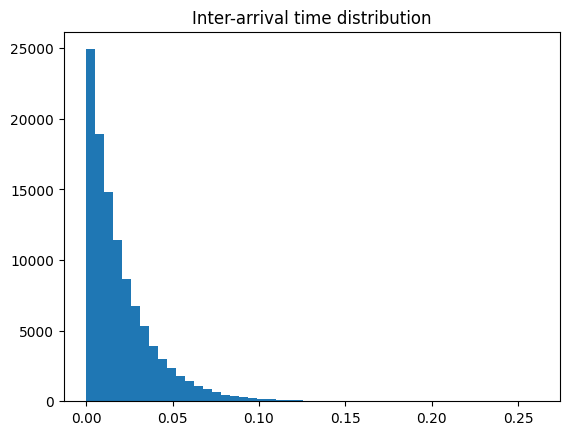

Average Customer service time = 0.20 minutes


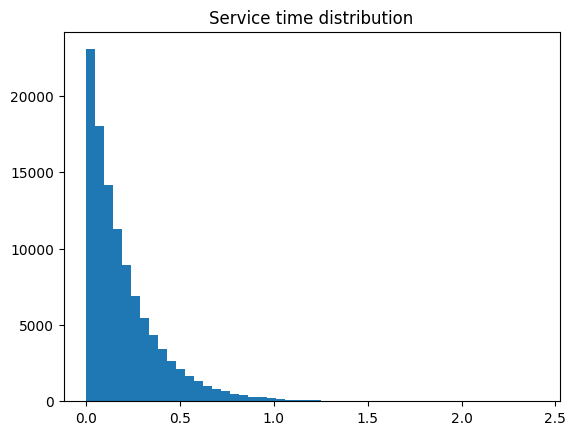

Average Customer delay time = 0.15 minutes


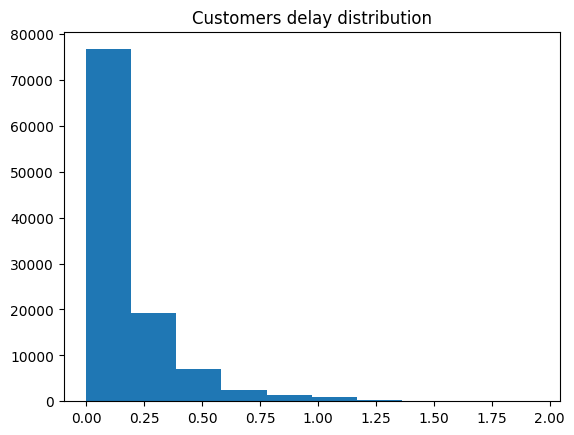

Average Server queue length = 7.71


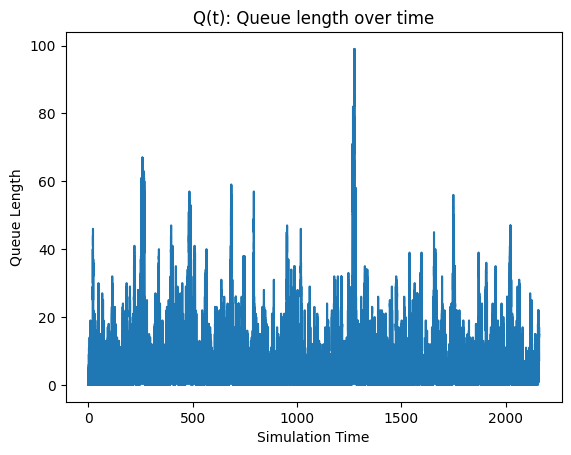

Average Server Utilization rate = 91.28%


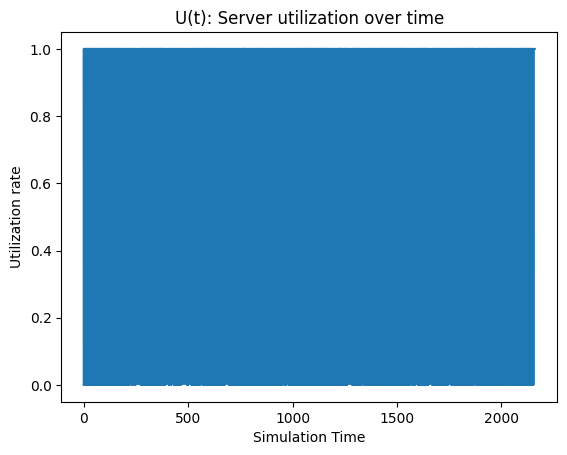

In [3]:
bank = example1(seed=42, n_servers=11)
bank.plot()

In [4]:
results = {}
for n_servers in range(11, 21):
    d = results.setdefault(n_servers, {
        'customer_delay_time': [],
        'server_queue_length': []
    })
    for _ in range(30):
        bank = example1(seed=None, n_servers=n_servers)
        average_customer_delay_time = statistics.mean(bank.customer_delay_times)
        average_server_queue_length = bank.server.average_queue_length

        d['customer_delay_time'].append(average_customer_delay_time)
        d['server_queue_length'].append(average_server_queue_length)

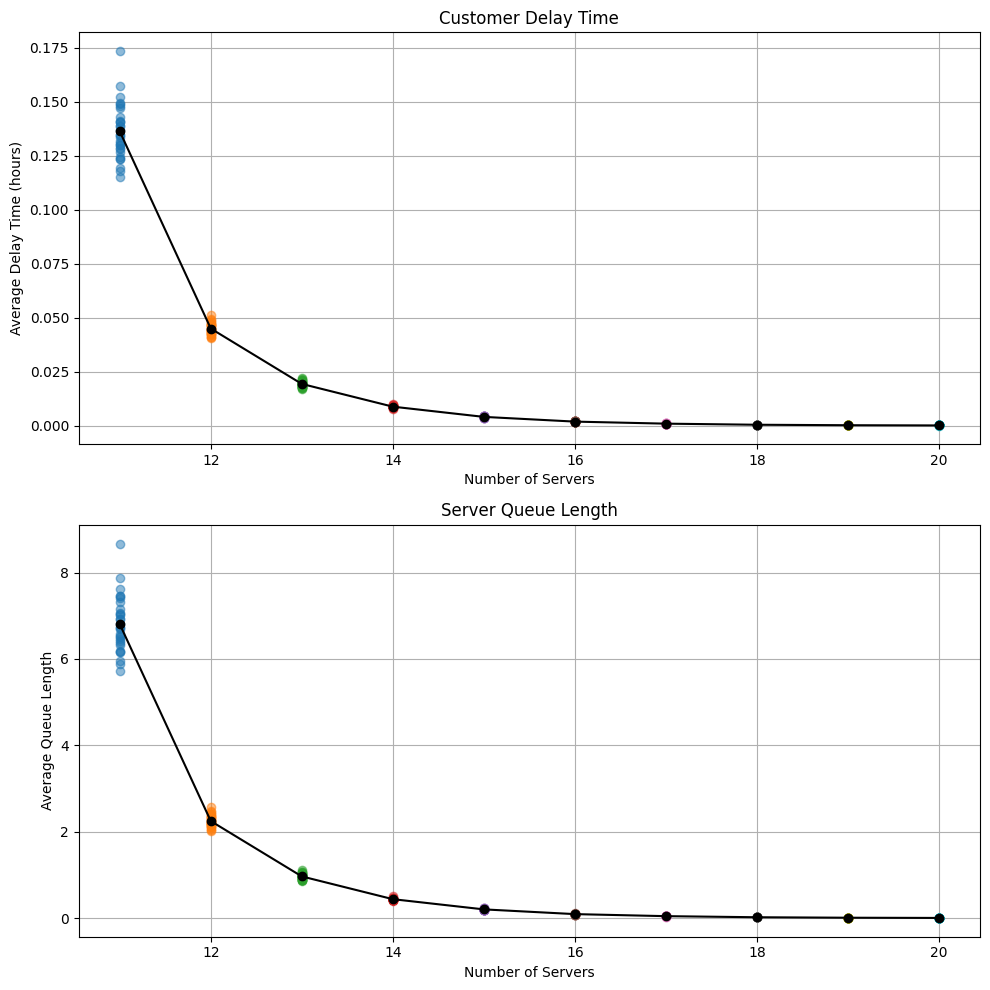

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

for n_servers, d in results.items():
    ax[0].plot([n_servers] * len(d['customer_delay_time']), d['customer_delay_time'], 'o', alpha=0.5)
    ax[1].plot([n_servers] * len(d['server_queue_length']), d['server_queue_length'], 'o', alpha=0.5)

for i, (n_servers, d) in enumerate(results.items()):
    ax[0].plot([n_servers], [statistics.mean(d['customer_delay_time'])], 'o', color='black')
    ax[1].plot([n_servers], [statistics.mean(d['server_queue_length'])], 'o', color='black')
    
    if i > 0:
        ax[0].plot([n_servers - 1, n_servers], [statistics.mean(results[n_servers - 1]['customer_delay_time']), statistics.mean(d['customer_delay_time'])], 'k-')
        ax[1].plot([n_servers - 1, n_servers], [statistics.mean(results[n_servers - 1]['server_queue_length']), statistics.mean(d['server_queue_length'])], 'k-')

ax[0].set_title('Customer Delay Time')
ax[0].set_xlabel('Number of Servers')
ax[0].set_ylabel('Average Delay Time (hours)')
ax[0].grid(True)

ax[1].set_title('Server Queue Length')
ax[1].set_xlabel('Number of Servers')
ax[1].set_ylabel('Average Queue Length')
ax[1].grid(True)

plt.tight_layout()
plt.show()


# Exercise 2

Consider a physician who schedules patients every 10 minutes.

Service times are distributed:
  - 90% of patients require 9 minutes
  - 10% of patients require 12 minutes

$$
E[S] = 9 * 0.9 + 12 * 0.1 = 9.3  \;minutes
$$

$$
ro=\frac{E[S]}{E[A]}=\frac{9.3}{10}=0.93 < 1 \Rightarrow \text{The system is stable}
$$

However,
$$
V[S] = E[S^2] - E[S]^2 = 9^2 * 0.9 + 12^2 * 0.1 - 9.3^2 = 0.81 \;minutes^2
$$

Some queue will build up. Compare your intuition of the maximum queue length with a simulation

In [6]:
def example2(seed):
    random.seed(seed)
    
    env = simpy.Environment()
    system = GGcSystem(
        env=env,
        inter_arrival_distribution=lambda: 10,                              # minutes
        service_distribution=lambda: 12 if random.random() < 0.1 else 9,    # n customers/minutes
        n_servers=1
    )
    env.process(system.run())
    env.run(until=60 * 24 * 90)  # minutes
    
    return system

Average Customer Inter-arrival time = 10.00 minutes


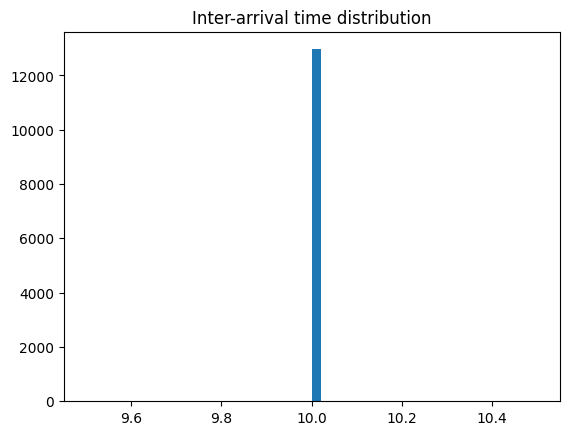

Average Customer service time = 9.29 minutes


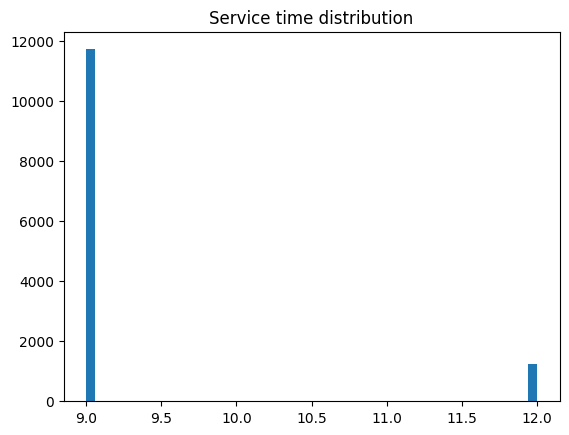

Average Customer delay time = 0.39 minutes


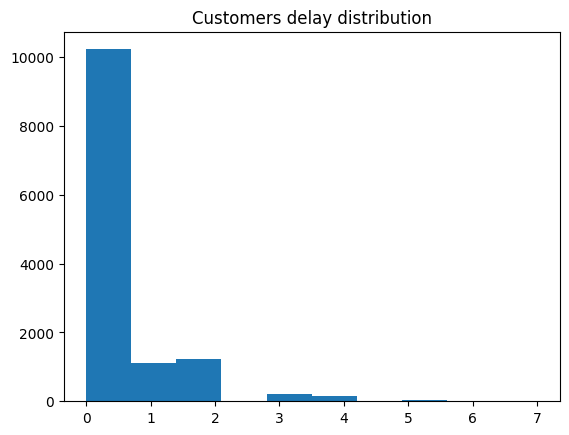

Average Server queue length = 0.04


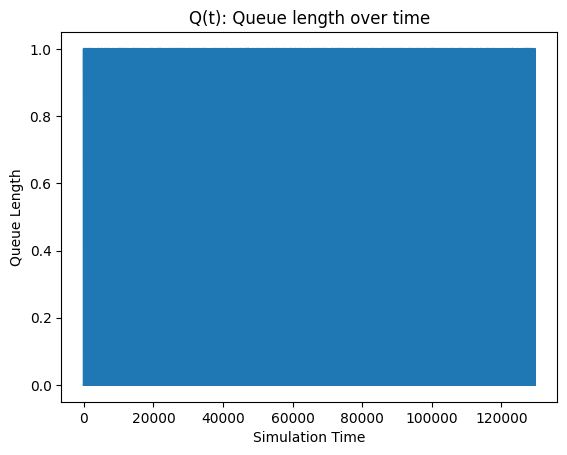

Average Server Utilization rate = 92.88%


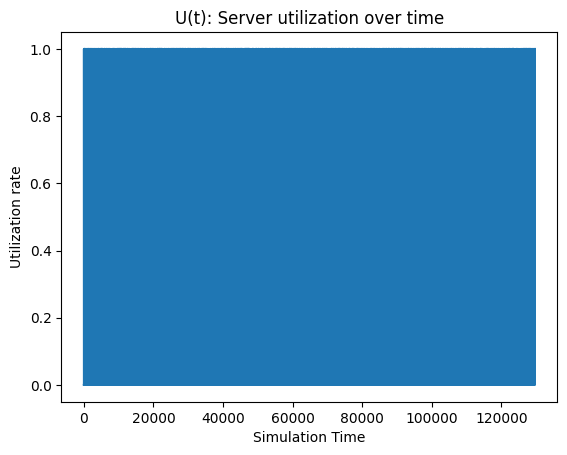

In [7]:
physician = example2(seed=42)
physician.plot()